<a href="https://colab.research.google.com/github/Epsita-R/PRODIGY/blob/main/Prodigy_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [4]:
# Load the dataset
data = pd.read_csv('/content/twitter_training.csv')
print(data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [7]:
# Renaming columns for better understanding
data.columns = ['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content']
print("\nUpdated DataFrame with Proper Column Names:")
print(data.head())


Updated DataFrame with Proper Column Names:
   Tweet ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [11]:
# Ensure 'Tweet Content' is a string
data['Tweet Content'] = data['Tweet Content'].astype(str)

# Analyze sentiment distribution
sentiment_counts = data['Sentiment'].value_counts()

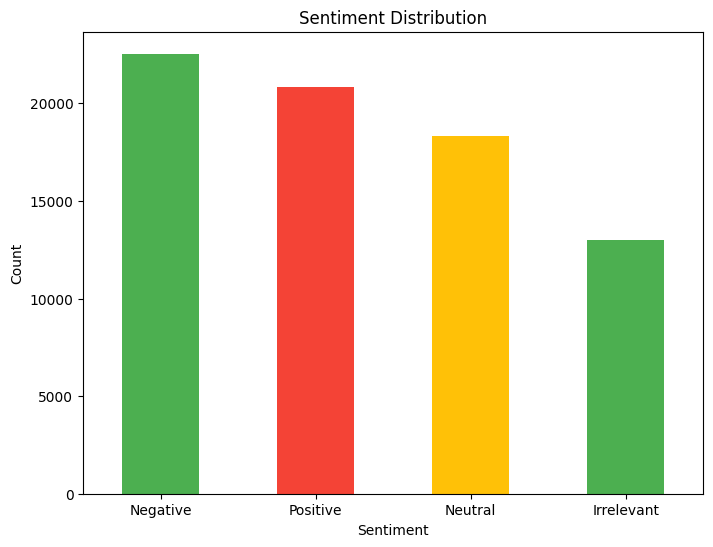

In [12]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['#4CAF50', '#F44336', '#FFC107'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

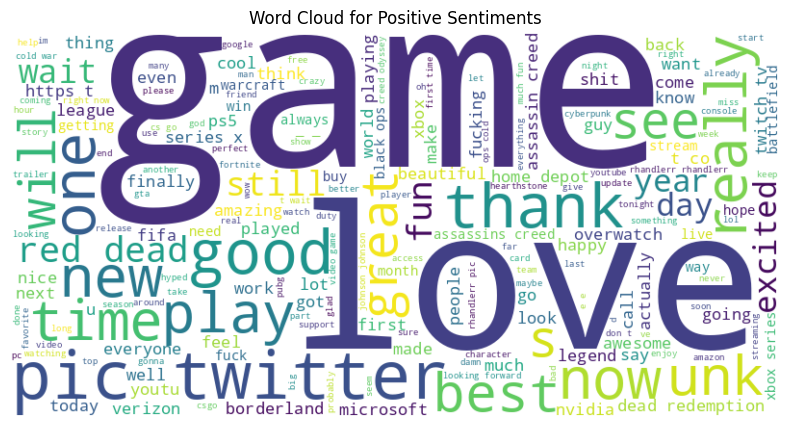

In [13]:
# Generate and plot word cloud for positive sentiments
positive_tweets = ' '.join(data[data['Sentiment'] == 'Positive']['Tweet Content'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

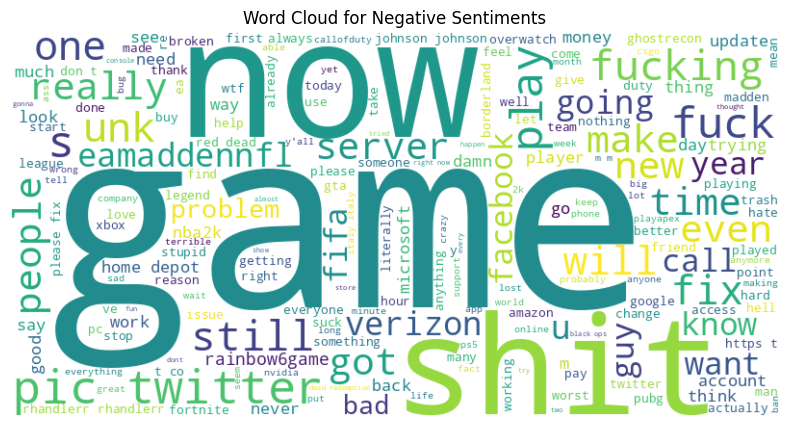

In [14]:
# Generate and plot word cloud for negative sentiments (if applicable)
negative_tweets = ' '.join(data[data['Sentiment'] == 'Negative']['Tweet Content'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

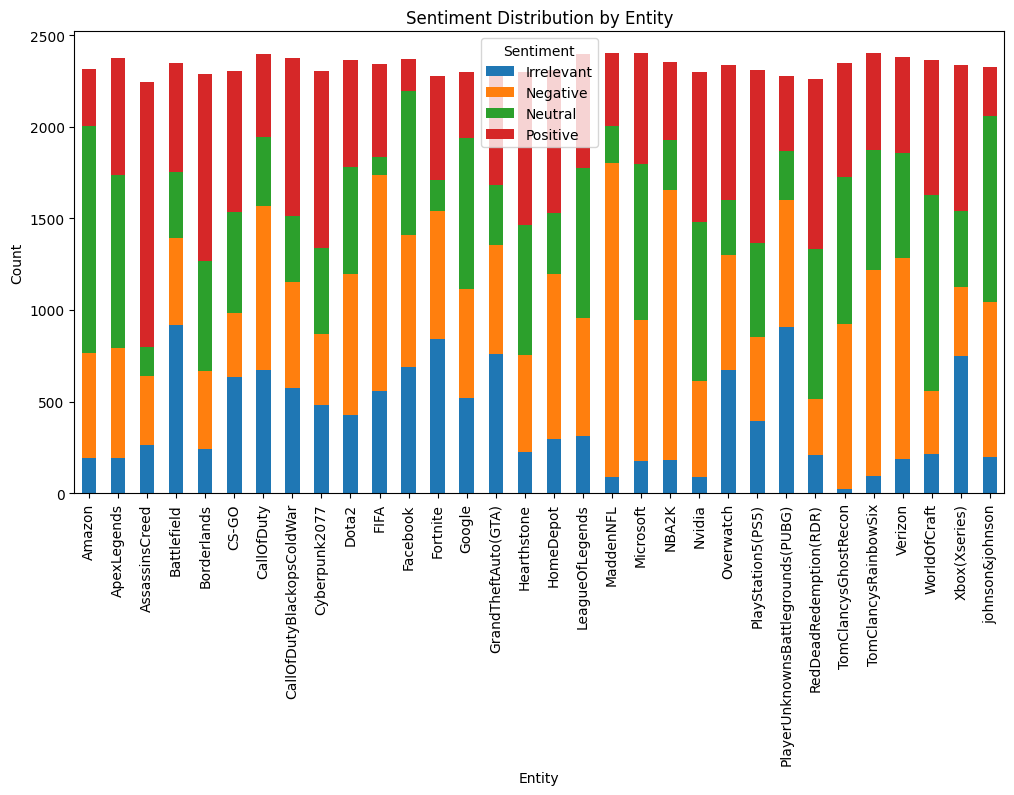

In [15]:
# Compare sentiments for different entities
entity_sentiment = data.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)
entity_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()